In [4]:
import requests
import time
from PIL import Image
from io import BytesIO
import json
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

<b>Pillow</b> is a powerful, easy-to-use image-processing library in Python. It's a fork of the original PIL (Python Imaging Library) and provides tools to open, manipulate, and save image files like JPEG, PNG, GIF, TIFF, and BMP. Pillow is widely used in applications where image manipulation is needed, such as in web development, machine learning, and graphical design.   
img = Image.open('path/to/image.jpg')

<b>BytesIO</b> is a class in Python's io module that allows you to work with byte data in memory as if it were a file. This is particularly useful for handling binary data, such as images, audio, PDFs etc, without needing to save them to disk, so it is faster and temporary.

<div style="background-color: lightblue; padding: 10px;">
    <p><b> The Cat API</b></p>
    <p style="margin: 0;">Use case: Get random images of cats or dogs, which is great for practice with image data.</p>
     <p style="margin: 0;">Benefits: Simple structure, no authentication needed, and a fun way to practice handling images.</p>
</div>

In [2]:
# Request 'YOUR_API_KEY' from the Cat API website
api_key = 'YOUR_API_KEY'

# Define headers with API key
headers = {'x-api-key': api_key}

# Define URLs for the API endpoints
imgsearchAPIendpoint = 'https://api.thecatapi.com/v1/images/search'
image_url_template = 'https://api.thecatapi.com/v1/images/search?breed_ids={}' # points to an endpoint of The Cat API that searches for cat images
breed_url = 'https://api.thecatapi.com/v1/breeds'

Not all web-scraping codes limit request rates, but it’s a good practice to do so.  
Respect for Servers: Sending too many requests too quickly can overload the server you’re scraping from, which can lead to your IP being blocked.  
Avoiding Bans: Many websites have rate limits to prevent abuse. Ignoring these can get you banned from accessing the site.  
Politeness: It’s a way to be considerate of the resources and bandwidth of the website you’re scraping

In [7]:
# Function to limit requests
def rate_limited_request(url, headers=None, max_retries=3, delay=1):   # Ask 3 times and wait 1 second between times
    for attempt in range(max_retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response
        else:
            print(f"Attempt {attempt + 1} failed. Retrying in {delay} seconds...")
            time.sleep(delay)
    return None

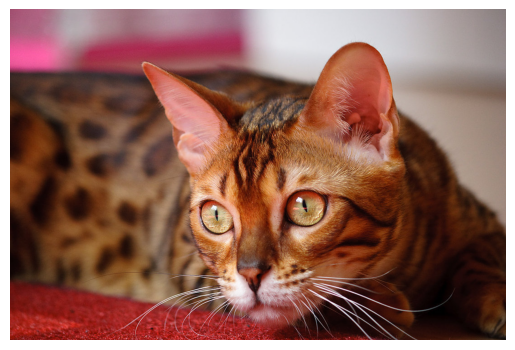

Time taken for fetching random image: 2.2811226844787598
[{'breeds': [],
  'height': 730,
  'id': '405',
  'url': 'https://cdn2.thecatapi.com/images/405.jpg',
  'width': 1095}]
Image saved as _PEqOH17A.jpg


In [10]:
# Step 1: Fetch a random cat image
start_time = time.time()
randimgmeta_response = rate_limited_request(imgsearchAPIendpoint, headers=headers)   # Sends the 1st GET request to the API endpoint to fetch a random cat image metadata incl. url

if randimgmeta_response:
    pic = randimgmeta_response.json()                      # Parses json into Python's list of dictionaries (all cats), see format below this cell
    if pic:
        image_url = pic[0]['url']                          # Extracts the URL of the cat image from the first dictionary in the list as API search will return only one image
        photo_response = rate_limited_request(image_url)   # 2nd request: Downloads the image data from the URL provided in the metadata.
        if photo_response:
            img = Image.open(BytesIO(photo_response.content))
            plt.imshow(img)                                # Open and display the image using matplotlib
            plt.axis('off')                                # Hide axes
            plt.show()
        else: print("Failed to download the image.")
    else: print("No image found.")
else: print("Failed to retrieve image metadata.")

print("Time taken for fetching random image:", time.time() - start_time)

pprint(pic)

img.save(f"{img_data['id']}.jpg")                          # Save the fetched image locally
print(f"Image saved as {img_data['id']}.jpg")

Enter the number of images to fetch: 3


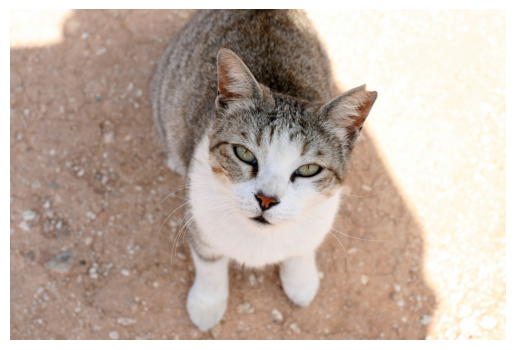

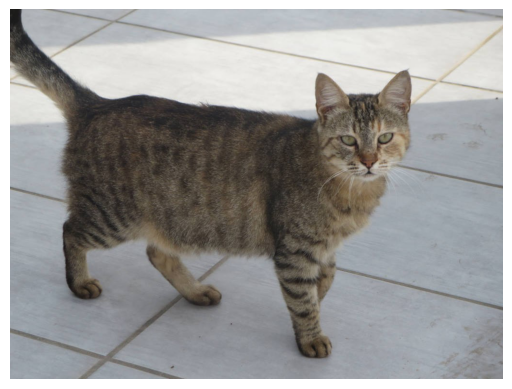

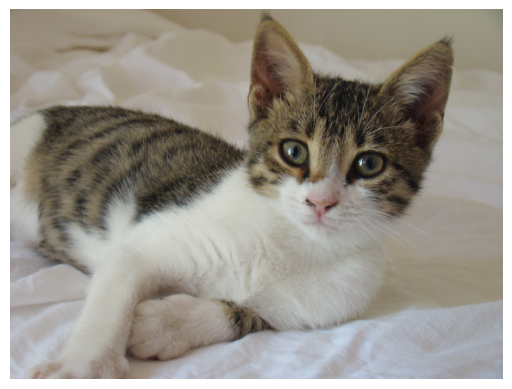

In [11]:
# Fetch numerous images
num_images = int(input("Enter the number of images to fetch: "))
image_response = rate_limited_request(image_url_template.format(selected_id) + f"&limit={num_images}", headers=headers)

if image_response:
    images = image_response.json()
    for img_data in images:
        img_response = rate_limited_request(img_data['url'])   # Send a GET request to the URL extracted in (). img_data is a dictionary containing metadata about the image, and 'url' is the key that holds the link to the image
        if img_response:
            img = Image.open(BytesIO(img_response.content))    # Analogy: Imagine you receive a picture in an envelope (the HTTP response). You take the picture out of the envelope (the binary content) and put it into a photo frame (the BytesIO object). Now, you can look at the picture in the frame (using Image.open).
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else: print(f"Failed to download image {img_data['id']}.")
else: print("Failed to retrieve images.")

{'adaptability': 5,
 'affection_level': 5,
 'alt_names': '',
 'cfa_url': 'http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx',
 'child_friendly': 3,
 'country_code': 'EG',
 'country_codes': 'EG',
 'description': 'The Abyssinian is easy to care for, and a joy to have in your '
                'home. They’re affectionate cats and love both people and '
                'other animals.',
 'dog_friendly': 4,
 'energy_level': 5,
 'experimental': 0,
 'grooming': 1,
 'hairless': 0,
 'health_issues': 2,
 'hypoallergenic': 0,
 'id': 'abys',
 'image': {'height': 1445,
           'id': '0XYvRd7oD',
           'url': 'https://cdn2.thecatapi.com/images/0XYvRd7oD.jpg',
           'width': 1204},
 'indoor': 0,
 'intelligence': 5,
 'lap': 1,
 'life_span': '14 - 15',
 'name': 'Abyssinian',
 'natural': 1,
 'origin': 'Egypt',
 'rare': 0,
 'reference_image_id': '0XYvRd7oD',
 'rex': 0,
 'shedding_level': 2,
 'short_legs': 0,
 'social_needs': 5,
 'stranger_friendly': 5,
 'suppressed_tail': 0,
 'temperament': 'Ac

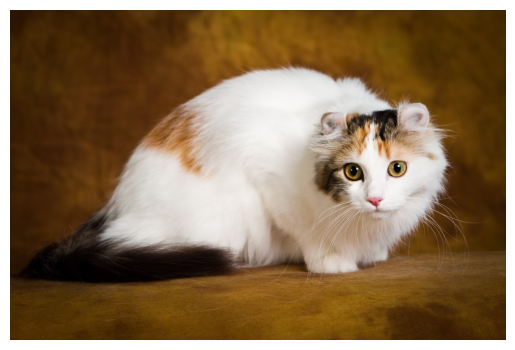

In [12]:
# Fetch breed data
response = rate_limited_request(breed_url, headers=headers)   # Send a GET request to the breed_url endpoint. The response from this request is expected to be in JSON format, which is typically a list of dictionaries.           
if response:
    breeds = response.json()
    if breeds:
        pprint(breeds[0])                     # Print the first breed dictionary to see the keys (if there are id and name of the breed)
    else: print("No breed data found.")
else: print("Failed to retrieve breed data.")

    
breed_data = [(breed.get('id'), breed.get('name')) for breed in breeds if 'id' in breed and 'name' in breed]   # Extract breed IDs and names, 'breeds' is defined above
breed_df = pd.DataFrame(breed_data, columns=['Breed ID', 'Breed Name'])                                        # Convert to DataFrame for easy viewing
print("\nAvailable Breeds:")
print(breed_df)
# print(breed_df.to_string(index=False))

selected_id = input("\nEnter the Breed ID to fetch images (e.g., 'cypr'): ")



image_response = rate_limited_request(image_url_template.format(selected_id), headers=headers)  # Fetch image metadata for the selected breed, useful to fetch the actual images later
if image_response:
    images = image_response.json()
    if images:
        img_data = images[0]                                               # Access the first image search endpoint found for selected breed
        print(f"Image ID: {img_data['id']}, URL: {img_data['url']}")
        img_response = rate_limited_request(img_data['url'])               # Fetch the image content
        if img_response:
            img = Image.open(BytesIO(img_response.content))                # Take the binary content of an image received from an HTTP response, wrap it in a BytesIO object to simulate a file, and then open it as an image using the Pillow library.
            plt.imshow(img)                                                # Display the image using matplotlib
            plt.axis('off')
            plt.show()
        else: print("Failed to download the image.")
    else: print(f"No images found for breed ID '{selected_id}'.")
else: print("Failed to retrieve images.")

In [14]:
# Export data to cvs
breed_df.to_csv('breed_data.csv', index=False)
print("Breed data exported to breed_data.csv")

Breed data exported to breed_data.csv
